In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, cluster, silhouette_samples, silhouette_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from pylab import rcParams
import seaborn as sns

In [2]:
data_dir = "./../"
data = pd.read_excel(data_dir + "corona_tested_individuals_subset_ver_00132.xlsx")

In [3]:
# label = data["infectionProb"]

In [4]:
data

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-09-02,0,0,0,0,0,Positive,No,Female,Other
1,2021-09-02,0,0,0,0,0,Positive,No,Female,Other
2,2021-09-02,0,0,0,0,0,Negative,No,Female,Other
3,2021-09-02,0,0,0,0,0,Negative,No,Male,Other
4,2021-09-02,0,0,0,0,0,Positive,No,Male,Other
...,...,...,...,...,...,...,...,...,...,...
224725,2021-08-22,1,1,0,0,0,Negative,No,Male,Contact with confirmed
224726,2021-08-22,1,0,0,0,0,Negative,No,Female,Other
224727,2021-08-22,0,0,0,0,0,Negative,No,Female,Other
224728,2021-08-22,0,0,0,0,0,Positive,No,Male,Contact with confirmed


In [5]:
data.loc[data['corona_result'] == "Positive", 'covid'] = 1
data.loc[data['corona_result'] == "Negative", 'covid'] = 0

In [6]:
data.loc[data['age_60_and_above'] == "Yes", 'sixty_above'] = 1
data.loc[data['age_60_and_above'] == "No", 'sixty_above'] = 0

In [7]:
data.loc[data['gender'] == "Male", 'male'] = 1
data.loc[data['gender'] == "Female", 'male'] = 0

In [8]:
data1 = data.drop(["corona_result", "age_60_and_above", "gender", "test_indication", "test_date"], axis = 1)

In [9]:
data1

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male
0,0,0,0,0,0,1.0,0.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0
2,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0.0,0.0,1.0
4,0,0,0,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
224725,1,1,0,0,0,0.0,0.0,1.0
224726,1,0,0,0,0,0.0,0.0,0.0
224727,0,0,0,0,0,0.0,0.0,0.0
224728,0,0,0,0,0,1.0,0.0,1.0


In [10]:
data1.dropna(axis=0, inplace = True)

In [11]:
data1

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male
0,0,0,0,0,0,1.0,0.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0
2,0,0,0,0,0,0.0,0.0,0.0
3,0,0,0,0,0,0.0,0.0,1.0
4,0,0,0,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
224725,1,1,0,0,0,0.0,0.0,1.0
224726,1,0,0,0,0,0.0,0.0,0.0
224727,0,0,0,0,0,0.0,0.0,0.0
224728,0,0,0,0,0,1.0,0.0,1.0


In [12]:
data2 = data1[data1["covid"] == 1]

In [13]:
data2

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male
0,0,0,0,0,0,1.0,0.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0
4,0,0,0,0,0,1.0,0.0,1.0
5,0,0,0,0,0,1.0,0.0,0.0
6,0,0,0,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
224720,0,1,0,0,0,1.0,0.0,1.0
224721,0,0,0,0,1,1.0,0.0,1.0
224723,0,0,0,0,0,1.0,0.0,0.0
224728,0,0,0,0,0,1.0,0.0,1.0


# Data Visalisation

<AxesSubplot:xlabel='sixty_above', ylabel='count'>

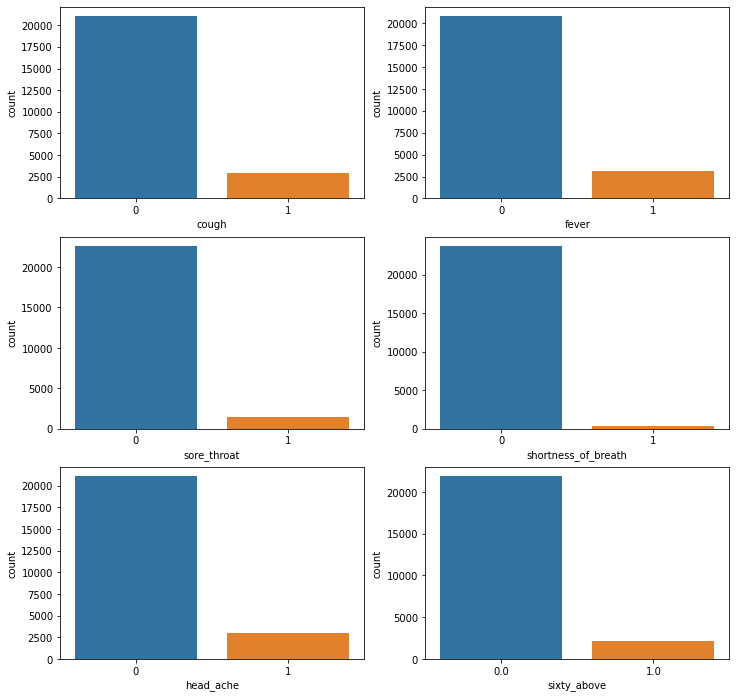

In [18]:
plt.figure(figsize=[12,12])
plt.subplot(321)
sns.countplot(x= "cough", data= data2)
plt.subplot(322)
sns.countplot(x= "fever", data= data2)
plt.subplot(323)
sns.countplot(x= "sore_throat", data= data2)
plt.subplot(324)
sns.countplot(x= "shortness_of_breath", data= data2)
plt.subplot(325)
sns.countplot(x= "head_ache", data= data2)
plt.subplot(326)
sns.countplot(x= "sixty_above", data= data2)

<AxesSubplot:>

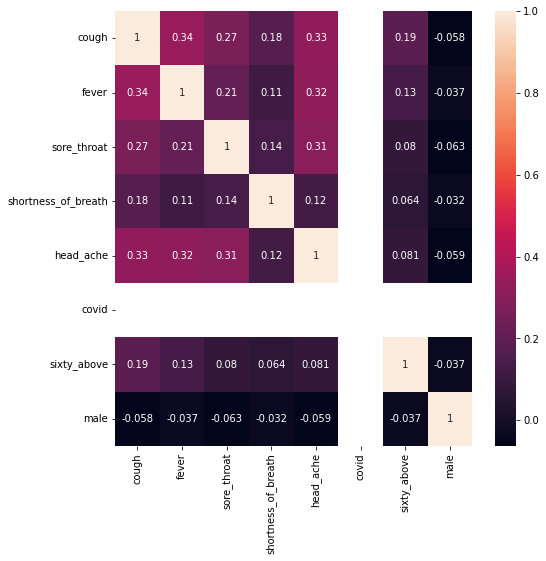

In [19]:
plt.figure(figsize=[8,8])
sns.heatmap(data2.corr(), annot=True)

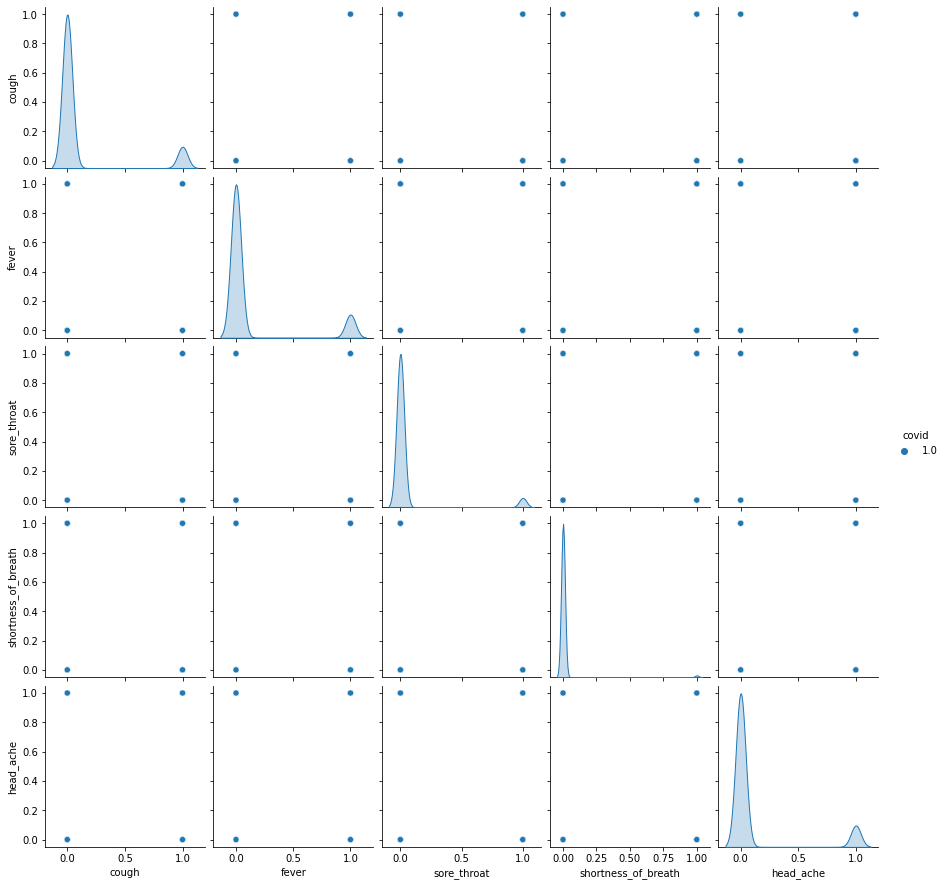

In [21]:
sns.pairplot(data2, hue = "covid", vars = ["cough", "fever", "sore_throat","shortness_of_breath", "head_ache"])

<AxesSubplot:>

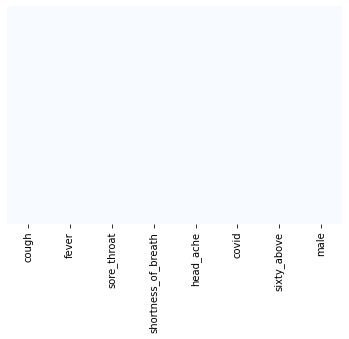

In [22]:
sns.heatmap(data2 == "Other", yticklabels=False, cbar=False, cmap = "Blues")

In [23]:
# data2.dropna(axis=0, inplace = True)

In [24]:
data2

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male
0,0,0,0,0,0,1.0,0.0,0.0
1,0,0,0,0,0,1.0,0.0,0.0
4,0,0,0,0,0,1.0,0.0,1.0
5,0,0,0,0,0,1.0,0.0,0.0
6,0,0,0,0,0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
224720,0,1,0,0,0,1.0,0.0,1.0
224721,0,0,0,0,1,1.0,0.0,1.0
224723,0,0,0,0,0,1.0,0.0,0.0
224728,0,0,0,0,0,1.0,0.0,1.0


In [14]:
scaled_data = scale(data2)

In [26]:
# scaled_data1 = scaled_data[:50000, :]

In [21]:
scaled_data.shape

(24024, 8)

# Three Clusters

In [15]:
model = KMeans(n_clusters=3, random_state=42)

In [16]:
model.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [17]:
model.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
silhouette_score(scaled_data, model.labels_)

0.5496584076264591

In [18]:
data2["Clusters"] = model.labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_20852/378983031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clusters"] = model.labels_


In [27]:
data2

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male,Clusters
0,0,0,0,0,0,1.0,0.0,0.0,1
1,0,0,0,0,0,1.0,0.0,0.0,1
4,0,0,0,0,0,1.0,0.0,1.0,1
5,0,0,0,0,0,1.0,0.0,0.0,1
6,0,0,0,0,0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
224720,0,1,0,0,0,1.0,0.0,1.0,1
224721,0,0,0,0,1,1.0,0.0,1.0,0
224723,0,0,0,0,0,1.0,0.0,0.0,1
224728,0,0,0,0,0,1.0,0.0,1.0,1


<AxesSubplot:xlabel='Clusters', ylabel='count'>

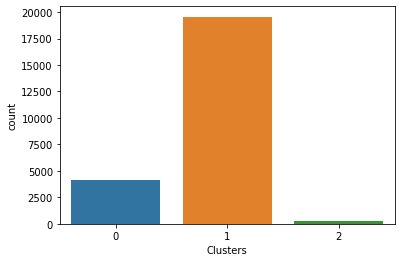

In [30]:
sns.countplot(x= "Clusters", data= data2)

In [31]:
data2["Clusters"] = model.labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_27220/378983031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clusters"] = model.labels_


<AxesSubplot:xlabel='sixty_above', ylabel='count'>

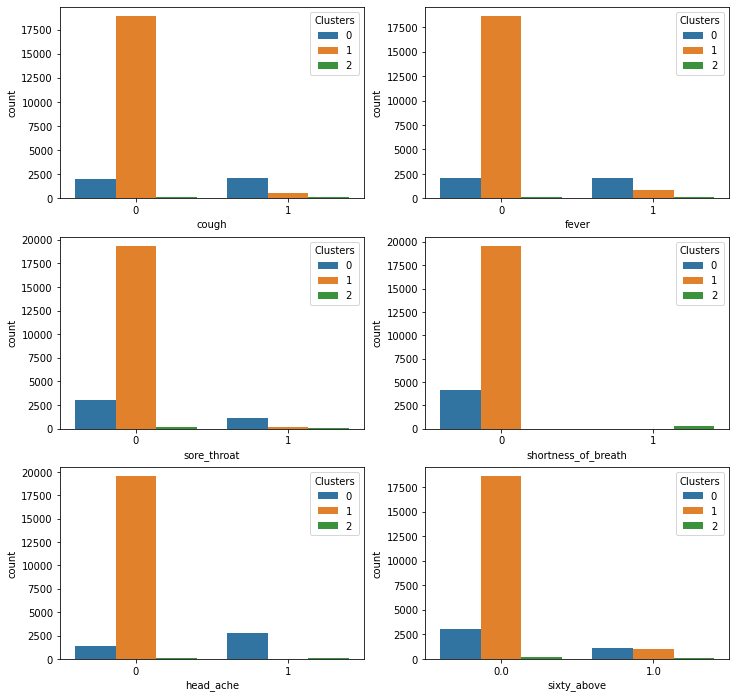

In [32]:
plt.figure(figsize=[12,12])
plt.subplot(321)
sns.countplot(x= "cough", hue = "Clusters", data= data2)
plt.subplot(322)
sns.countplot(x= "fever", hue = "Clusters", data= data2)
plt.subplot(323)
sns.countplot(x= "sore_throat", hue = "Clusters", data= data2)
plt.subplot(324)
sns.countplot(x= "shortness_of_breath", hue = "Clusters", data= data2)
plt.subplot(325)
sns.countplot(x= "head_ache", hue = "Clusters", data= data2)
plt.subplot(326)
sns.countplot(x= "sixty_above", hue = "Clusters", data= data2)

In [29]:
data2.to_csv("long_short_covid_data(3clus).csv", index = False)

# Two Clusters

In [30]:
model12 = KMeans(n_clusters=2, random_state=42)

In [31]:
model12.fit(scaled_data)

KMeans(n_clusters=2, random_state=42)

In [32]:
model12.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
silhouette_score(scaled_data, model12.labels_)

0.5716235307037959

In [34]:
data2["long_covid"] = model12.labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_32044/1209469561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["long_covid"] = model12.labels_


<AxesSubplot:xlabel='long_covid', ylabel='count'>

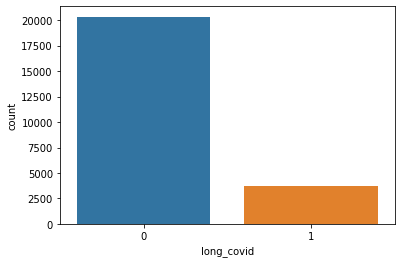

In [35]:
sns.countplot(x= "long_covid", data= data2)

In [26]:
data2

,cough,fever,sore_throat,shortness_of_breath,head_ache,covid,sixty_above,male,Clusters
0,0,0,0,0,0,1.0,0.0,0.0,1
1,0,0,0,0,0,1.0,0.0,0.0,1
4,0,0,0,0,0,1.0,0.0,1.0,1
5,0,0,0,0,0,1.0,0.0,0.0,1
6,0,0,0,0,0,1.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
224720,0,1,0,0,0,1.0,0.0,1.0,1
224721,0,0,0,0,1,1.0,0.0,1.0,0
224723,0,0,0,0,0,1.0,0.0,0.0,1
224728,0,0,0,0,0,1.0,0.0,1.0,1


<AxesSubplot:xlabel='long_covid', ylabel='count'>

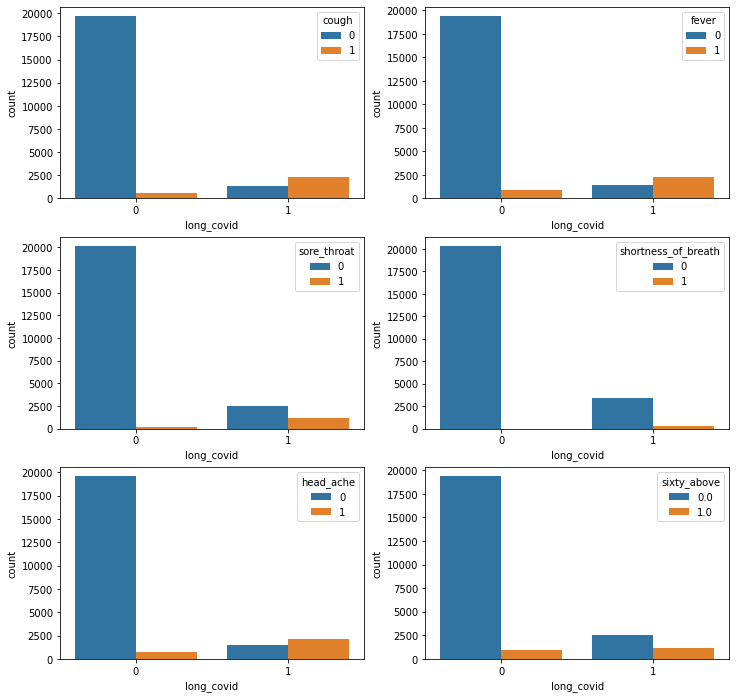

In [38]:
plt.figure(figsize=[12,12])
plt.subplot(321)
sns.countplot(x= "long_covid", hue = "cough", data= data2)
plt.subplot(322)
sns.countplot(x= "long_covid", hue = "fever", data= data2)
plt.subplot(323)
sns.countplot(x= "long_covid", hue = "sore_throat", data= data2)
plt.subplot(324)
sns.countplot(x= "long_covid", hue = "shortness_of_breath", data= data2)
plt.subplot(325)
sns.countplot(x= "long_covid", hue = "head_ache", data= data2)
plt.subplot(326)
sns.countplot(x= "long_covid", hue = "sixty_above", data= data2)

In [40]:
data2.to_csv("long_short_covid_data.csv", index = False)

<AxesSubplot:>

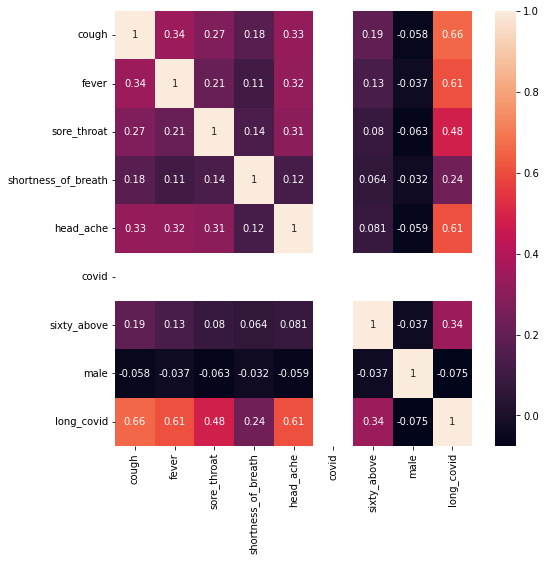

In [39]:
plt.figure(figsize=[8,8])
sns.heatmap(data2.corr(), annot=True)

# Four Clusters

In [38]:
model14 = KMeans(n_clusters=4, random_state=42)

In [39]:
model14.fit(scaled_data)

KMeans(n_clusters=4, random_state=42)

In [40]:
model14.labels_

array([1, 1, 0, ..., 1, 0, 0])

In [54]:
silhouette_14 = silhouette_score(scaled_data, model14.labels_)

In [55]:
silhouette_14

0.5462305812862596

In [56]:
data2["Clusters"] = model14.labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_4912/1679773451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clusters"] = model14.labels_


<AxesSubplot:xlabel='Clusters', ylabel='count'>

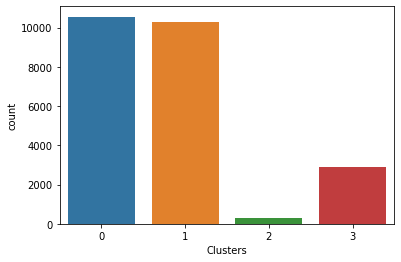

In [57]:
sns.countplot(x= "Clusters", data= data2)

<AxesSubplot:>

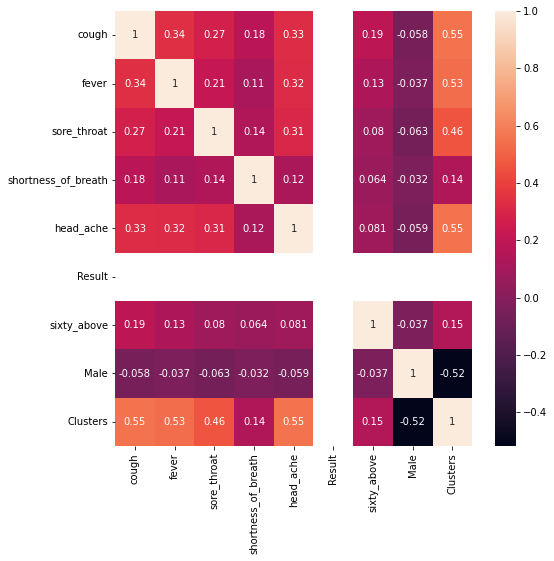

In [58]:
plt.figure(figsize=[8,8])
sns.heatmap(data2.corr(), annot=True)

# Five Cluster

In [48]:
model15 = KMeans(n_clusters=5, random_state=42)

In [50]:
model15.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [52]:
model15.labels_

array([4, 4, 0, ..., 4, 0, 0])

In [59]:
silhouette_score(scaled_data, model15.labels_)

0.6272592311134856

In [61]:
data2["Clusters"] = model15.labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_4912/4203213736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clusters"] = model15.labels_


<AxesSubplot:xlabel='Clusters', ylabel='count'>

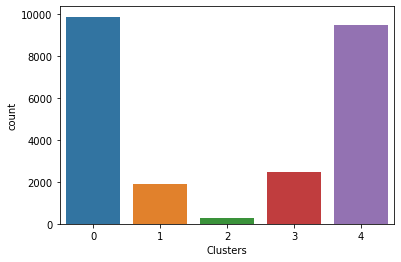

In [62]:
sns.countplot(x= "Clusters", data= data2)

# Multiple

In [64]:
kmeans_multiple = [KMeans(n_clusters=k, random_state=40).fit(scaled_data) for k in range(1, 11)]
silhouette_scores = [silhouette_score(scaled_data, model.labels_) for model in kmeans_multiple[1:]]

In [65]:
silhouette_scores

[0.5716235307037959,
 0.5259838338820233,
 0.544802265581944,
 0.6272592311134856,
 0.6855603909871972,
 0.7444131830449687,
 0.7870084532469505,
 0.7937961010186566,
 0.8121734039983949]

Text(0, 0.5, 'Silk Co-efficient')

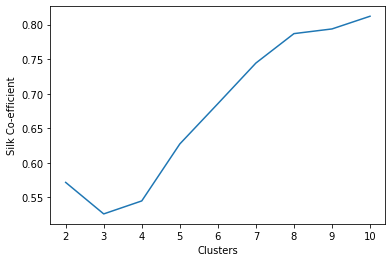

In [67]:
plt.plot(range(2,11),silhouette_scores)
plt.xlabel("Clusters")
plt.ylabel("Silk Co-efficient")

# Zero-One Normaisation

In [68]:
data2["Clusters"] = kmeans_multiple[-1].labels_

C:\Users\ushou\AppData\Local\Temp/ipykernel_4912/809991547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["Clusters"] = kmeans_multiple[-1].labels_


<AxesSubplot:xlabel='Clusters', ylabel='count'>

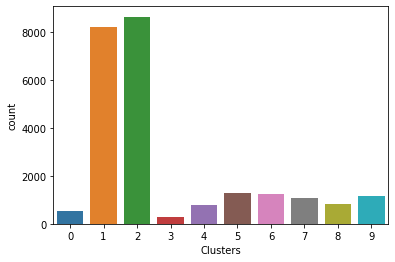

In [69]:
sns.countplot(x= "Clusters", data= data2)